In [1]:
import pandas as pd
prices = pd.read_csv("data/sample_prices.csv")
returns = prices.pct_change()
returns = returns.dropna()

In [2]:
returns

,BLUE,ORANGE
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249
10,0.006151,-0.168261


In [3]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [4]:
deviations = returns - returns.mean()
squared_deviations = deviations**2
variance = squared_deviations.mean()

import numpy as np
volatility = np.sqrt(variance)
volatility

BLUE      0.022957
ORANGE    0.076212
dtype: float64

In [5]:
number_of_obs = returns.shape[0]
variance = squared_deviations.sum() / (number_of_obs - 1)
volatility = variance**0.5
volatility

BLUE      0.023977
ORANGE    0.079601
dtype: float64

#### Annualized volatility

In [6]:
returns.std() * np.sqrt(12)

BLUE      0.083060
ORANGE    0.275747
dtype: float64

## Portfolios CSV

In [7]:
returns = pd.read_csv(
    "data/Portfolios_Formed_on_ME_monthly_EW.csv",
    header=0,
    index_col=0,
    parse_dates=True,
    na_values=-99.99
)

In [8]:
returns.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [9]:
columns = ['Lo 20', 'Hi 20']
returns = returns[columns]
returns = returns / 100

In [10]:
returns.columns = ['SmallCap', 'LargeCap']

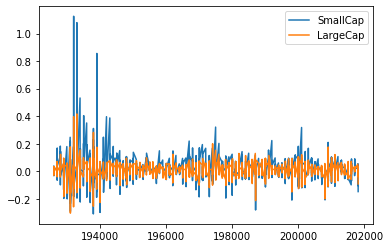

In [11]:
returns.plot.line()

In [19]:
returns.head()

,SmallCap,LargeCap
192607,-0.0057,0.0333
192608,0.0384,0.0233
192609,-0.0048,-0.0009
192610,-0.0329,-0.0295
192611,-0.0055,0.0316


In [12]:
returns.std()

SmallCap    0.097197
LargeCap    0.056325
dtype: float64

In [13]:
annualized_vol = returns.std() * np.sqrt(12)
annualized_vol

SmallCap    0.336701
LargeCap    0.195116
dtype: float64

In [14]:
n_months = returns.shape[0]
return_per_month = (returns + 1).prod() ** (1/n_months) - 1
return_per_month

SmallCap    0.011860
LargeCap    0.007859
dtype: float64

In [15]:
annualized_return = (return_per_month+1)**12 - 1
annualized_return

SmallCap    0.151977
LargeCap    0.098490
dtype: float64

In [16]:
annualized_return = (returns + 1).prod() ** (12/n_months) - 1 # see return_per_month
annualized_return

SmallCap    0.151977
LargeCap    0.098490
dtype: float64

#### Risk

In [17]:
annualized_return/annualized_vol

SmallCap    0.451370
LargeCap    0.504778
dtype: float64

In [18]:
riskfree_rate = 0.03
excess_return = annualized_return - riskfree_rate
sharpe_ratio = excess_return/annualized_vol
sharpe_ratio

SmallCap    0.362271
LargeCap    0.351023
dtype: float64

#### Home task
Explore the same for Hi 20 vLow 20 and compare 